https://albumentations.ai/docs/

https://albumentations-demo.herokuapp.com/

In [17]:
import albumentations as album
import tensorflow as tf
from keras.applications.mobilenet import preprocess_input
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [7]:
train_path = r'C:\Users\Mohamed Hamde\OneDrive - Culture and Science City\Desktop\final project/fruits_dataset/train'

In [3]:
transform = album.Compose([
    album.HorizontalFlip(always_apply=False, p=1.0),
    album.VerticalFlip(always_apply=False, p=1.0),
    album.RandomBrightnessContrast(p=0.2),
    album.Blur(blur_limit=9, always_apply=False, p=0.5)])

In [4]:
def preprocessing_function(x):
    preprocessed_x = preprocess_input(x)
    transformed_image = transform(image=preprocessed_x)['image']
    return transformed_image

In [12]:
train = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocessing_function).flow_from_directory(train_path, target_size=(224, 224), batch_size=32)

Found 9516 images belonging to 6 classes.


In [13]:
X_train, y_train = next(train)

In [19]:
labels = ['fresh apples', 'fresh banana', 'fresh oranges', 'rotten apples', 'rotten banana', 'rotten oranges']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


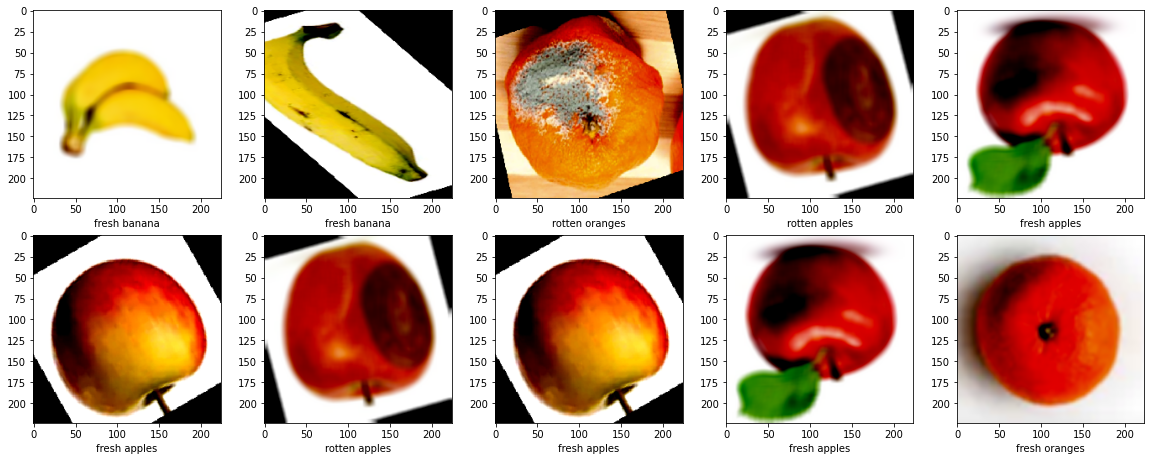

In [20]:
plt.figure(figsize=(20, 20))
for n, i in enumerate(np.random.randint(0, len(X_train), 10)):
    plt.subplot(5, 5, n+1)
    plt.imshow((X_train[i]).astype(np.float32))
    plt.xlabel(labels[np.argmax(y_train[i])])